# Libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

import re
import nltk
from nltk import word_tokenize
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/trippy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Loading the data

In [47]:
train = pd.read_csv('twitter_training.csv',header=None)
validation = pd.read_csv('twitter_validation.csv',header=None)
train.columns = ['id','information','sentiment','text']
validation.columns = ['id','information','sentiment','text']

In [48]:
validation.head()

,id,information,sentiment,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [49]:
train.head()

,id,information,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


# Data Filtering 

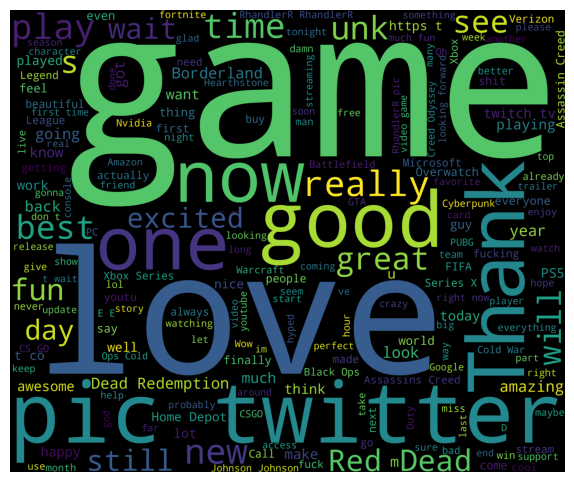

In [50]:
# Filter the training data to keep only positive sentiment tweets
positive_tweets = train[train['sentiment'] == 'Positive']
words = ' '.join(positive_tweets['text'].astype(str))
cleaned_words = ' '.join([word for word in words.split() if not word.startswith('@')])
wordcloud = WordCloud(
    background_color='black',
    stopwords=STOPWORDS,
    width=3000, height=2500
).generate(cleaned_words)

# Show the word cloud visualization
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

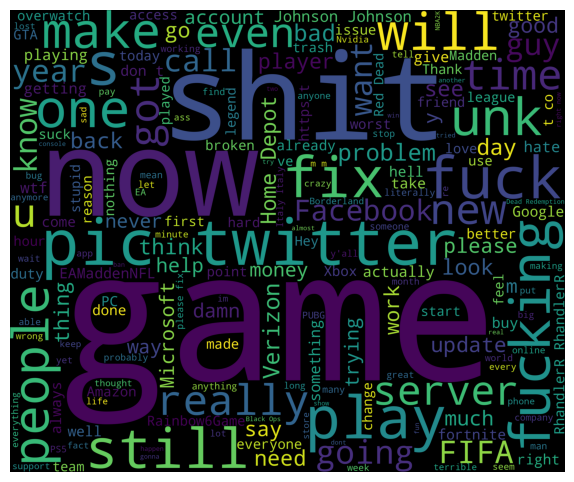

In [51]:
# Filter the training data to keep only negative sentiment tweets
negative_tweets = train[train['sentiment'] == 'Negative']
words = ' '.join(negative_tweets['text'].astype(str))
cleaned_words = ' '.join([word for word in words.split() if not word.startswith('@')])
wordcloud = WordCloud(
    background_color='black',
    stopwords=STOPWORDS,
    width=3000, height=2500
).generate(cleaned_words)

# visualization
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

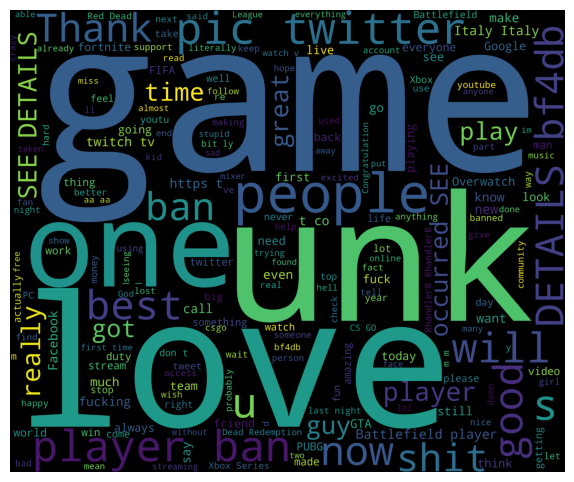

In [52]:
# Filter the training data to keep only irrelevant sentiment tweets
irrelevant_tweets = train[train['sentiment'] == 'Irrelevant']
words = ' '.join(irrelevant_tweets['text'].astype(str))
cleaned_words = ' '.join([word for word in words.split() if not word.startswith('@')])
wordcloud = WordCloud(
    background_color='black',
    stopwords=STOPWORDS,
    width=3000, height=2500
).generate(cleaned_words)

# visualization
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [53]:
# Group the 'train' dataframe by the 'information' and 'sentiment' columns and count the occurrences
count_by_category = train.groupby(by=["information", "sentiment"]).count().reset_index()
print(count_by_category.head())

   information   sentiment    id  text
0       Amazon  Irrelevant   192   186
1       Amazon    Negative   576   575
2       Amazon     Neutral  1236  1207
3       Amazon    Positive   312   308
4  ApexLegends  Irrelevant   192   192


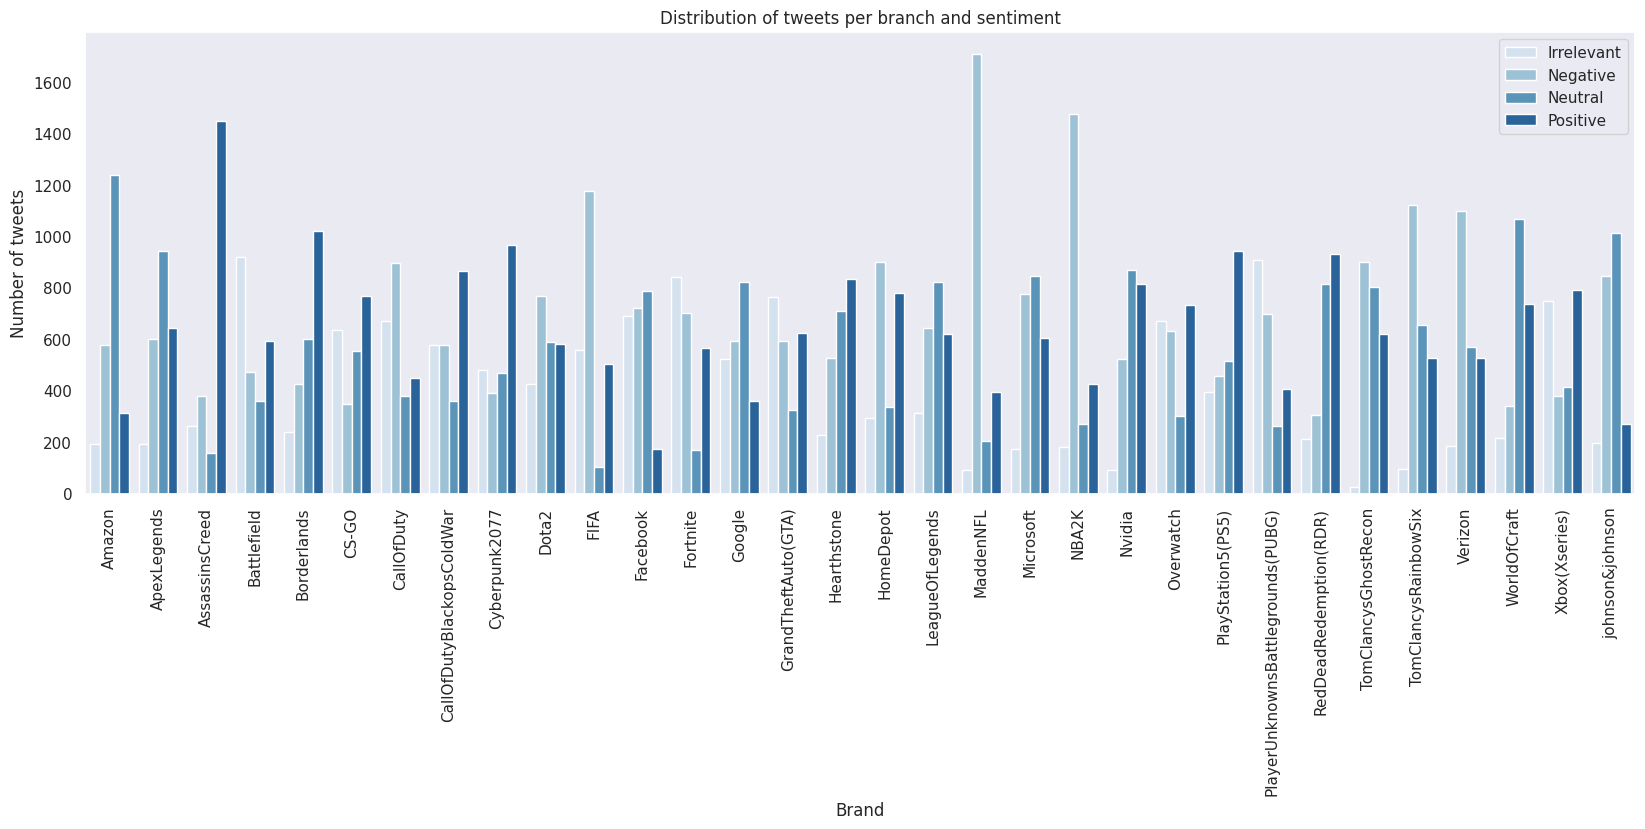

In [54]:
sns.set(rc={'figure.figsize':(20,6), 'font.size': 14})
ax = sns.barplot(data=count_by_category, x="information", y="id", hue="sentiment", palette="Blues")
ax.legend(loc='upper right')

#Plot
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Number of tweets")
plt.title("Distribution of tweets per branch and sentiment")
plt.grid(axis='y')

In [55]:
print(train['text'].dtype)

train['text'] = train['text'].astype(str)

# def clean_tweet(tweet):
#     if not isinstance(tweet, str):
#         return ''


object


# Data Preprocessing

In [56]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

def clean_tweet(tweet):
    tweet = re.sub(r"(?:\@|https?\://)\S+", "", tweet)
    tweet = re.sub(r"\#\w+", "", tweet)
    words = re.sub("[^a-zA-Z]", " ", tweet).lower().split()
    stops = set(stopwords.words('english'))
    meaningful_words = [w for w in words if w not in stops]
    return ' '.join(meaningful_words)

train['clean_text'] = train['text'].apply(clean_tweet)

train_data, test_data = train_test_split(train, test_size=0.2, random_state=42)

vectorizer = CountVectorizer(analyzer='word')

train_features = vectorizer.fit_transform(train_data['clean_text'])
test_features = vectorizer.transform(test_data['clean_text'])

# Use of RandomForestClassifier Model

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(train_features, train_data['sentiment'])
pred = rfc.predict(test_features)
accuracy = accuracy_score(pred, test_data['sentiment'])

# Accuracy of the model

In [58]:
print("Accuracy of Random Forest Classifier: ", accuracy)

Accuracy of Random Forest Classifier:  0.8967664189596305
